In [83]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D

In [108]:
numSamples = 204

base_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
dataset = pd.read_csv(base_dir+'\_data\dataset.csv', header=None)
# print(dataset)
data_arr = dataset.to_numpy()
# print(data_arr.shape)
data_arr = data_arr.reshape(15, 204)
# print(data_arr[0, :])
data_arr = data_arr.T
# print(data_arr[0, :])

new_dataset = pd.DataFrame(data_arr, columns=['Patient', 'Direction', 'Magnitude', 'Cz_1', 'Cz_2',
                                           'Cz_3', 'Cz_4', 'Agonist_1', 'Agonist_2', 'Agonist_3', 
                                           'Agonist_4', 'Agonist_5', 'Agonist_6', 'Agonist_7', 'Agonist_8'])
new_dataset.to_csv(base_dir+'\\_data\\transformed_dataset.csv')

### Extract the Inputs of the Model

In [88]:
input = new_dataset.drop(new_dataset.columns[[0,1,2,7,8,9,10,11,12,13,14]], axis = 1)
input_arr = input.to_numpy()
print(input_arr)

output = new_dataset.drop(new_dataset.columns[[0,1,2,3,4,5,6]], axis = 1)
output_arr = output.to_numpy()
output_arr

[[8.868028199 0.004678834 7.25e-10 0.120725838]
 [5.472524758 0.005359645 3.07e-08 0.117503862]
 [3.572469406 0.000805934 0.004902102 0.110458036]
 [5.825120636 0.008001813 8.1e-08 0.12515145]
 [4.953458707 0.002775221 2.43e-08 0.113534657]
 [2.913829268 0.003259367 0.01164612 0.114667838]
 [7.674765163 0.011848407 2.88e-09 0.118749375]
 [4.467669427 0.005850949 1.64e-09 0.120476743]
 [4.418512204 0.002350098 3.57e-09 0.108584681]
 [8.035900813 0.015152397 2.9e-09 0.124273018]
 [4.447860193 0.019744809 2.1e-09 0.116302736]
 [4.124030063 0.016176491 2.35e-09 0.115546126]
 [7.268110239 2.7e-09 0.039999998 0.022000212]
 [5.214525478 0.006266645 0.03999999 0.099999994]
 [3.980749168 0.005500462 0.034022805 0.094840382]
 [9.350469434 0.022092071 0.039998849 0.099999838]
 [3.468092069 0.010902026 0.039999999 0.1]
 [3.262848985 0.005387838 0.018322545 0.099999995]
 [6.96454775 0.01523757 0.023213727 0.160343808]
 [4.991867743 3.96e-06 1.45e-05 0.154165591]
 [3.652493118 0.000731964 0.00133534

array([[8.705701119, 0.003415522, 0.004435072, ..., 1.02e-06, 1.19e-06,
        0.234191366],
       [5.334891079, 0.007539081, 0.02469888, ..., 1.02e-06, 0.003103875,
        0.222347363],
       [3.284545372, 0.012409481, 0.023341903, ..., 5.01e-07,
        0.003885337, 0.229708097],
       ...,
       [6.532148804, 0.007052644, 0.047868057, ..., 9.99e-07,
        0.001724544, 0.173541911],
       [4.675326425, 0.012590156, 0.025475816, ..., 8.83e-11, 0.00155576,
        0.167595468],
       [3.453833309, 0.003599448, 0.018711711, ..., 8.37e-10,
        0.000373392, 0.299999999]], dtype=object)

### Complete PCA and find Principal Components

In [103]:
scaling = StandardScaler()

scaling.fit(input_arr)
scaled_data = scaling.transform(input_arr)

principal_comp = PCA()
principal_comp.fit(scaled_data)
x = principal_comp.transform(scaled_data)

print(x.shape)
print("Components = ", principal_comp.components_)
print("Variance = ", principal_comp.explained_variance_ratio_)

(204, 4)
Components =  [[ 0.51588385  0.63279668  0.30026758  0.4932257 ]
 [-0.09330236 -0.0145145   0.89772818 -0.43031164]
 [ 0.75366247 -0.02799775 -0.21888433 -0.61911118]
 [-0.39642326  0.77367552 -0.23667095 -0.43389128]]
Variance =  [0.4109274  0.24218025 0.2044866  0.14240576]


### Generate Plots

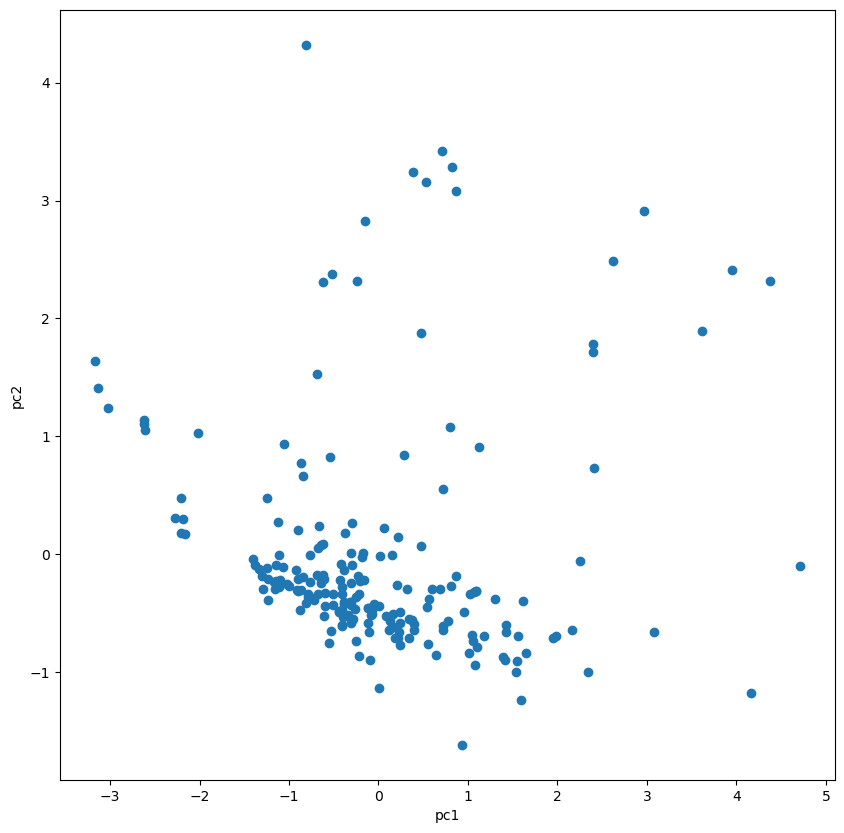

In [111]:
twoD = plt.figure(figsize=(10,10))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.scatter(x[:,0], x[:, 1])
twoD.show

twoD.savefig(base_dir + '/_images/PCA.jpg')